# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Step 1: Load the Data

In [1]:
#Importing Python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading data set into Pandas DataFrame

df = pd.read_excel("C:\\Users\\DELL\\Online-Retail-Exploratory-Data-Analysis\\Online Retail.xlsx")

In [3]:
#To display first five rows

df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#To display last five rows

df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Step 2: Explore the Data

In [5]:
#To find out total number of rows and columns in dataset

df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


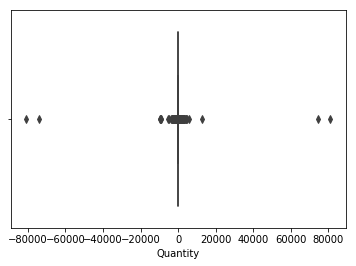

In [8]:
sns.boxplot(df['Quantity'])
plt.show()

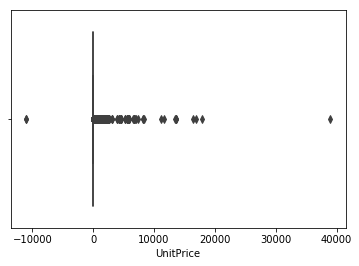

In [9]:
sns.boxplot(x=df['UnitPrice'])
plt.show()

Below are the observations:

- Quantity contains negative values which are logically not possible.
- Description and CustomerID has missing values as row count is not matching.
- There are outliers present in Quantity and UnitPrice rows.

## Step 3: Clean and Validate the Data

In [10]:
#Filtering negative values from Quantity column

df = df[df['Quantity'] >= 0]

In [11]:
#Dropping rows with missing or NaN values

df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null datetime64[ns]
UnitPrice      397924 non-null float64
CustomerID     397924 non-null float64
Country        397924 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [13]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


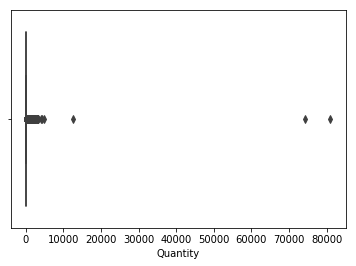

In [14]:
sns.boxplot(df['Quantity'])
plt.show()

## IQR Method

The interquartile range(IQR) defines the difference between the third and the first quartile. Quartiles are the partitioned values that divide the whole series into 4 equal parts. So, there are 3 quartiles. First Quartile is denoted by Q1 known as the lower quartile, the second Quartile is denoted by Q2 and the third Quartile is denoted by Q3 known as the upper quartile. Therefore, the interquartile range is equal to the upper quartile minus lower quartile.

Formula:
Interquartile range = Upper Quartile – Lower Quartile = Q­3 – Q­1

where Q1 is the first quartile and Q3 is the third quartile of the series.

In [15]:
#IQR

q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)

iqr = q3 - q1

In [16]:
q1, q3, iqr

(2.0, 12.0, 10.0)

In [17]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

lower_limit, upper_limit

(-13.0, 27.0)

In [18]:
#Find the outliers

df.loc[(df['Quantity']>upper_limit) & (df['Quantity']<lower_limit)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [19]:
# Trimming - delete the outlier data

new_df = df.loc[(df['Quantity'] < upper_limit) & (df['Quantity'] > lower_limit)]

print("Before removing outliers : ", len(df))
print("After removing outliers : ", len(new_df))
print("Outliers : ", len(df) - len(new_df))

Before removing outliers :  397924
After removing outliers :  372221
Outliers :  25703


## Step 4: Analyze the Data

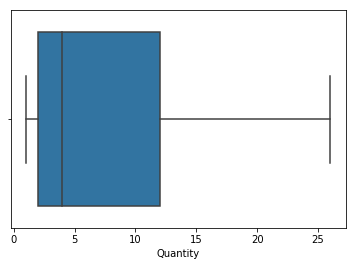

In [20]:
sns.boxplot(new_df['Quantity'])
plt.show()

In [21]:
new_df.describe()

,Quantity,UnitPrice,CustomerID
count,372221.000000,372221.000000,372221.000000
mean,7.027400,3.228413,15309.507811
std,6.658286,22.814736,1711.622480
min,1.000000,0.000000,12347.000000
25%,2.000000,1.250000,13985.000000
50%,4.000000,1.950000,15194.000000
75%,12.000000,3.750000,16813.000000
max,26.000000,8142.750000,18287.000000


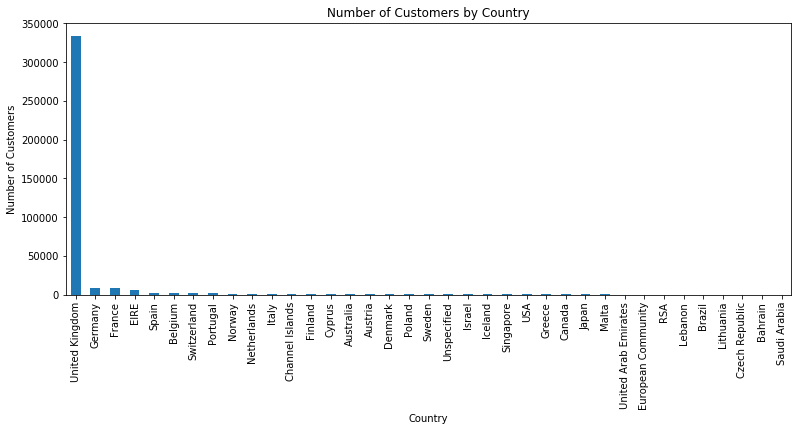

In [63]:
new_df.Country.value_counts().plot(kind='bar', figsize=(13,5))
plt.title("Number of Customers by Country")
plt.ylabel('Number of Customers')
plt.xlabel('Country');

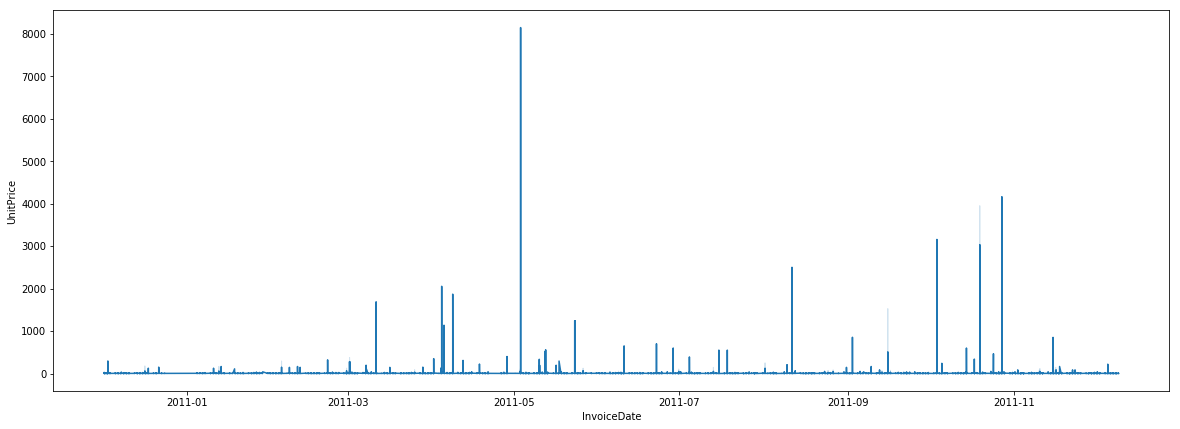

In [66]:
fig, ax = plt.subplots(figsize=(20, 7))
 
# drawing the plot
sns.lineplot(x="InvoiceDate", y="UnitPrice",
             data=new_df, ax = ax)
plt.show()

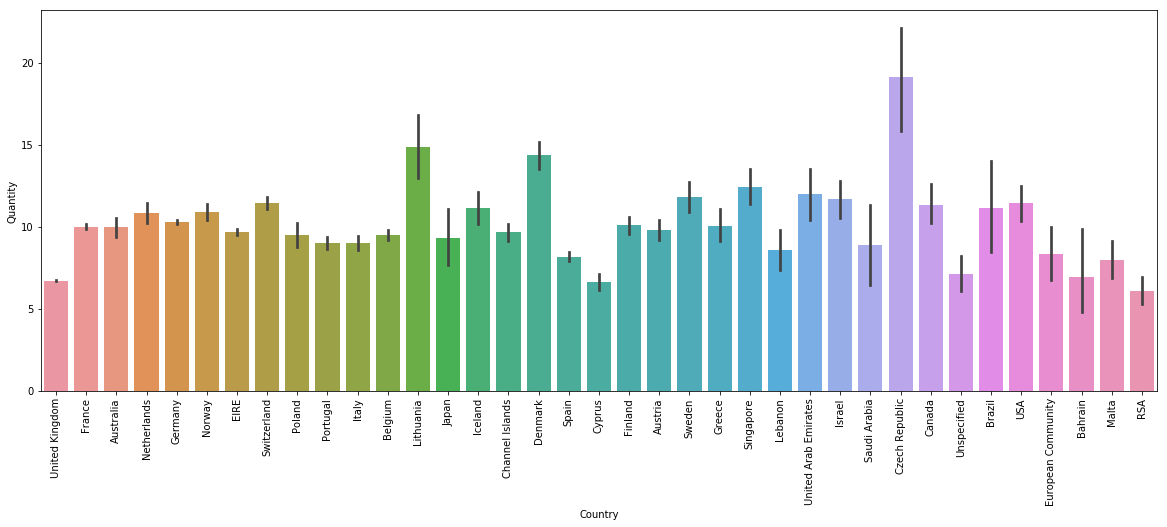

In [65]:
fig, ax = plt.subplots(figsize=(20, 7))
 
# drawing the plot
sns.barplot(new_df["Country"], new_df["Quantity"], ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
plt.figure(figsize=(7,7))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)
plt.pie(new_df['Quantity'],
        labels=new_df['Country'])

plt.show()